### For reference, we include the Attribute Information for the `seoul_bike_sharing` dataset:

*   DATE - format: "2017-12-01"
*   RENTED_BIKE_COUNT - Count of bikes rented at each hour
*   HOUR - Hour of the day
*   TEMPERATURE - Celsius
*   HUMIDITY - %
*   Windspeed - m/s
*   VISIBILITY - 10m
*   DEW_POINT_TEMPERATURE - Celsius
*   SOLAR_RADIATION - MJ/m2
*   RAINFALL - mm
*   SNOWFALL - cm
*   SEASONS -  "Autumn","Spring",..
*   HOLIDAY - "Holiday", "No holiday"
*   FUNCTIONING_DAY - "Yes", "No"


In [1]:
#importing libraries
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### Load the dataset

read `DATE` as type `character`.



In [2]:
# provide your solution here
seoul_bike_sharing <- read_csv("seoul_bike_sharing.csv",
                               col_types = cols('DATE'=col_character()))
head(seoul_bike_sharing)

X1,DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
1,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
5,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
6,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0,0,0,Winter,No Holiday,Yes


### Recast `DATE` as a date

format of the data, namely "%d/%m/%Y".




In [3]:
# provide your solution here
seoul_bike_sharing$DATE <- as.Date(seoul_bike_sharing$DATE,"%d/%m/%Y")

### Cast `HOURS` as a categorical variable

Also, coerce its levels to be an ordered sequence.  This will ensure visualizations correctly utilize `HOURS` as a discrete variable with the expected ordering.




In [4]:
# provide your solution here
seoul_bike_sharing['HOUR']<-factor(seoul_bike_sharing$HOUR,ordered=TRUE,levels=c(0:23))
seoul_bike_sharing['SEASONS'] <- factor(seoul_bike_sharing$SEASONS)
seoul_bike_sharing['HOLIDAY'] <- factor(seoul_bike_sharing$HOLIDAY)
seoul_bike_sharing['FUNCTION_DAY'] <- factor(seoul_bike_sharing$FUNCTIONING_DAY)

### Check the structure of the dataframe


In [5]:
str(seoul_bike_sharing)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	8465 obs. of  16 variables:
 $ X1                   : num  1 2 3 4 5 6 7 8 9 10 ...
 $ DATE                 : Date, format: "2017-12-01" "2017-12-01" ...
 $ RENTED_BIKE_COUNT    : num  254 204 173 107 78 100 181 460 930 490 ...
 $ HOUR                 : Ord.factor w/ 24 levels "0"<"1"<"2"<"3"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ TEMPERATURE          : num  -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ HUMIDITY             : num  37 38 39 40 36 37 35 38 37 27 ...
 $ WIND_SPEED           : num  2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ VISIBILITY           : num  2000 2000 2000 2000 2000 ...
 $ DEW_POINT_TEMPERATURE: num  -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SOLAR_RADIATION      : num  0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ RAINFALL             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SNOWFALL             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SEASONS              : Factor w/ 4 levels "Autumn","Spring",..: 4 4 4 4 

### Finally, ensure there are no missing values


In [6]:
sum(is.na(seoul_bike_sharing))

[1] 0

## Descriptive Statistics

Now take a look at some high level statistics of the `seoul_bike_sharing` dataset.


###  Dataset Summary

Use the base R `sumamry()` function to describe the `seoul_bike_sharing` dataset.



In [7]:
# provide your solution here
summary(seoul_bike_sharing)

       X1            DATE            RENTED_BIKE_COUNT      HOUR     
 Min.   :   1   Min.   :2017-12-01   Min.   :   2.0    7      : 353  
 1st Qu.:2117   1st Qu.:2018-02-27   1st Qu.: 214.0    8      : 353  
 Median :4233   Median :2018-05-28   Median : 542.0    9      : 353  
 Mean   :4233   Mean   :2018-05-28   Mean   : 729.2    10     : 353  
 3rd Qu.:6349   3rd Qu.:2018-08-24   3rd Qu.:1084.0    11     : 353  
 Max.   :8465   Max.   :2018-11-30   Max.   :3556.0    12     : 353  
                                                       (Other):6347  
  TEMPERATURE        HUMIDITY       WIND_SPEED      VISIBILITY  
 Min.   :-17.80   Min.   : 0.00   Min.   :0.000   Min.   :  27  
 1st Qu.:  3.00   1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935  
 Median : 13.50   Median :57.00   Median :1.500   Median :1690  
 Mean   : 12.77   Mean   :58.15   Mean   :1.726   Mean   :1434  
 3rd Qu.: 22.70   3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000  
 Max.   : 39.40   Max.   :98.00   Max.   :7.400   

### Some Basic Observations:

*   We can see from `DATE` that we have exactly a full year of data.
*   No records have zero bike counts.
*   Spring and Winter have the same count of records, while autumn has the least and Summer has the most.
*   Temperature has a large range, so we might expect it to explain at least some of the variation in bike rentals.
*   Precipitation seems to be quite rare, only happening in the fourth quartiles for both `RAINFALL` and `SNOWFALL`.
*   The average `WINDSPEED` is very light at only 1.7 m/s, and even the maximum is only a moderate breeze.

### how many Holidays there are?



In [8]:
# provide your solution here
seoul_bike_sharing %>%
group_by(HOLIDAY) %>%
tally()

HOLIDAY,n
Holiday,408
No Holiday,8057


There are 408 holidays

### the percentage of records that fall on a holiday.



In [9]:
# provide your solution 
proportions <- group_by(seoul_bike_sharing, HOLIDAY) %>% 
  summarize(n = length(X1)) %>% # count per gender
  ungroup %>% group_by(HOLIDAY) %>% 
  mutate(proportion = (n / 8465)*100) # proportion per gender
proportions

HOLIDAY,n,proportion
Holiday,408,4.819846
No Holiday,8057,95.180154


Approximately 5% of the records fall on a hoilday.

### Task 7 - Given there is exactly a full year of data, determine how many records we expect to have.

### Solution 7


In [10]:
# provide your solution here
Num_of_days_in_yr <- 365*0.95
round(Num_of_days_in_yr,0)

[1] 347

We expect to have 347 records in a full year data

###  Given the observations for the 'FUNCTIONING_DAY' how many records must there be?



In [11]:
# provide your solution here
seoul_bike_sharing %>%
group_by(FUNCTIONING_DAY) %>%
tally()

FUNCTIONING_DAY,n
Yes,8465



### Load the dplyr package, group the data by `SEASONS`, and use the `summarize()` function to calculate the seasonal total rainfall and snowfall.



In [12]:
# provide your solution here
seoul_bike_sharing %>%
group_by(SEASONS) %>%
summarise(sum(RAINFALL), sum(SNOWFALL))

SEASONS,sum(RAINFALL),sum(SNOWFALL)
Autumn,227.9,123.0
Spring,403.8,0.0
Summer,559.7,0.0
Winter,70.9,534.6


Wow, that seems like a lot of snow.



### Load the ggplot2 package so we can generate some data visualizations.


In [13]:
# provide your solution here
library(ggplot2)


### Scatter plot of `RENTED_BIKE_COUNT` vs `DATE`.


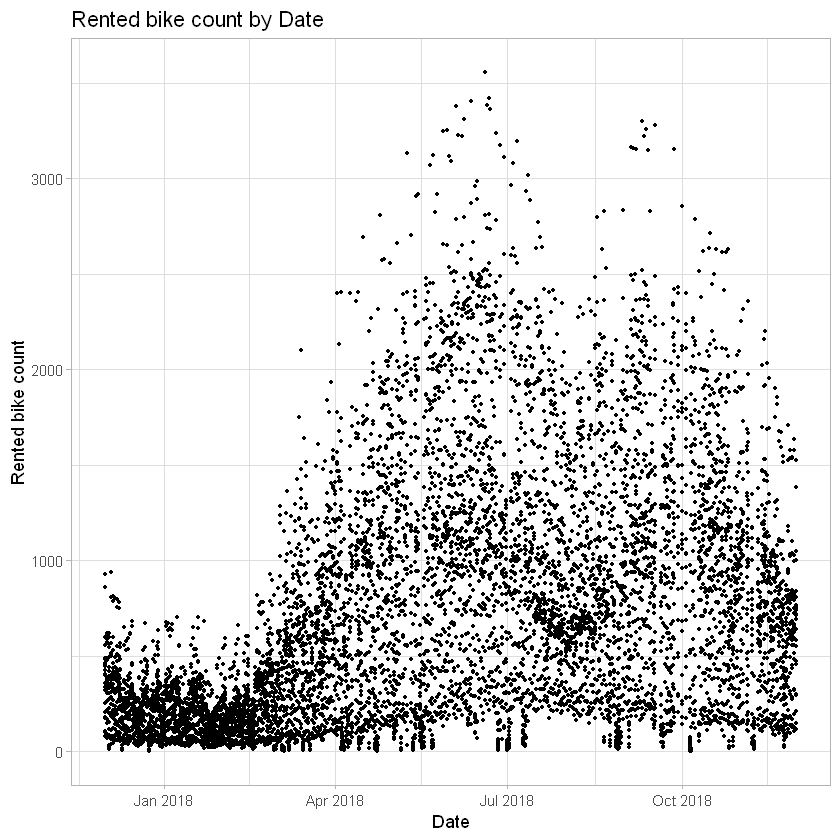

In [14]:
# provide your solution here
ggplot(seoul_bike_sharing, aes(x=DATE, y=RENTED_BIKE_COUNT)) +
geom_point(size=0.8)+
labs(x="Date",
    y="Rented bike count",
    title="Rented bike count by Date")+
theme_light()

We can see some patterns emerging here. From the above scatter plot, we can see that number of rented bikes starts increasing from month of April. It increases till month of June and then some amount of decreases in month of July. Again it starts increasing in August & decreases after October month.


### Using colour


### Scatter plot of the `RENTED_BIKE_COUNT` time series, adding `HOURS` as the colour.


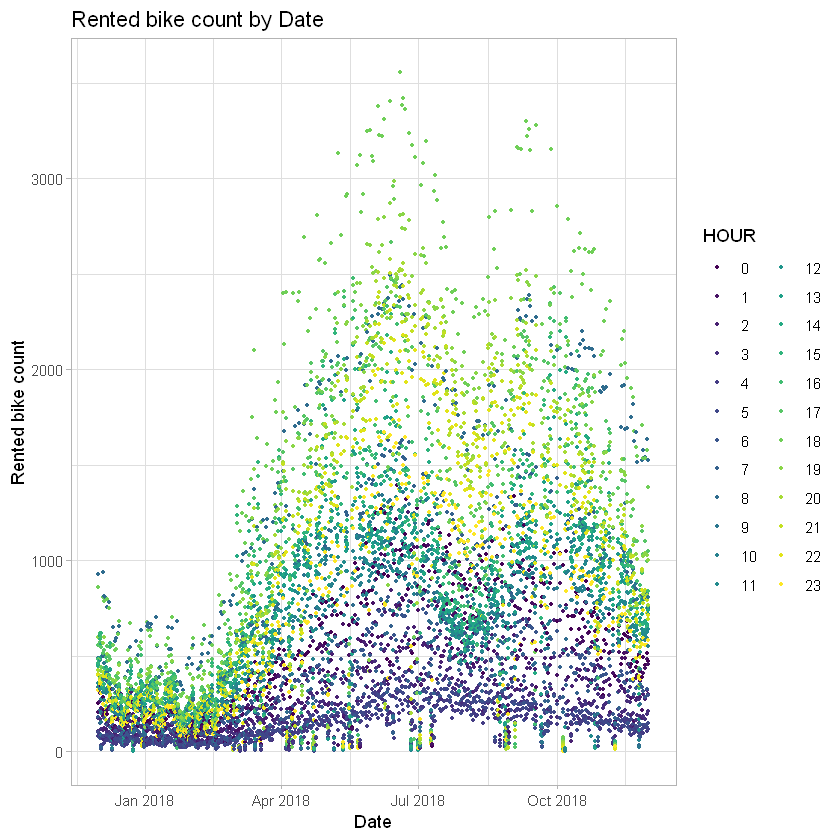

In [15]:
# provide your solution here
ggplot(seoul_bike_sharing, aes(x=DATE, y=RENTED_BIKE_COUNT,colour = HOUR)) +
geom_point(size=0.8)+
labs(x="Date",
    y="Rented bike count",
    title="Rented bike count by Date")+
theme_light()

### Solution


From the above scatter plot, we can see that bike rented counts increases after 12, between 12 and 18. It is less between 0 to 11. Yes, there are some points which shows high rental count between 0 and 11, but those are very less. 
There is clear indication that rental bike count increases after 12, between 12 and 18.

## Distributions


### A histogram overlaid with a kernel density curve


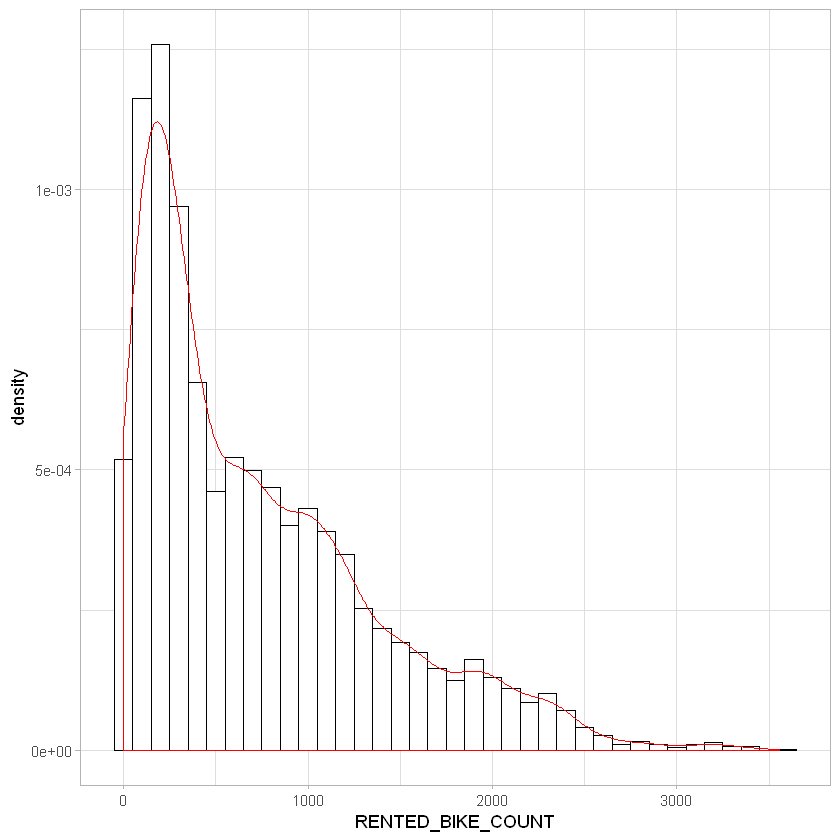

In [16]:
# provide your solution here
ggplot(seoul_bike_sharing, aes(x=RENTED_BIKE_COUNT))+
geom_histogram(binwidth = 100,aes(y=stat(density)),fill="white",colour="Black")+
geom_density(col = "Red")+
theme_light()



We can see from the histogram that most of the time there are relatively few bikes rented. Indeed, the 'mode', or most frequent amount of bikes rented, is about 250.

Judging by the 'bumps' at about 700, 900, and 1900, and 3200 bikes, it looks like there may be other modes hiding within subgroups of the data.

Interestingly, judging from the tail of the distribution, on rare occasions there are many more bikes rented out than usual.


## Correlation between two variables (scatter plot)

### Scatter plot to visualize the correlation between `RENTED_BIKE_COUNT` and `TEMPERATURE` by `SEASONS`.




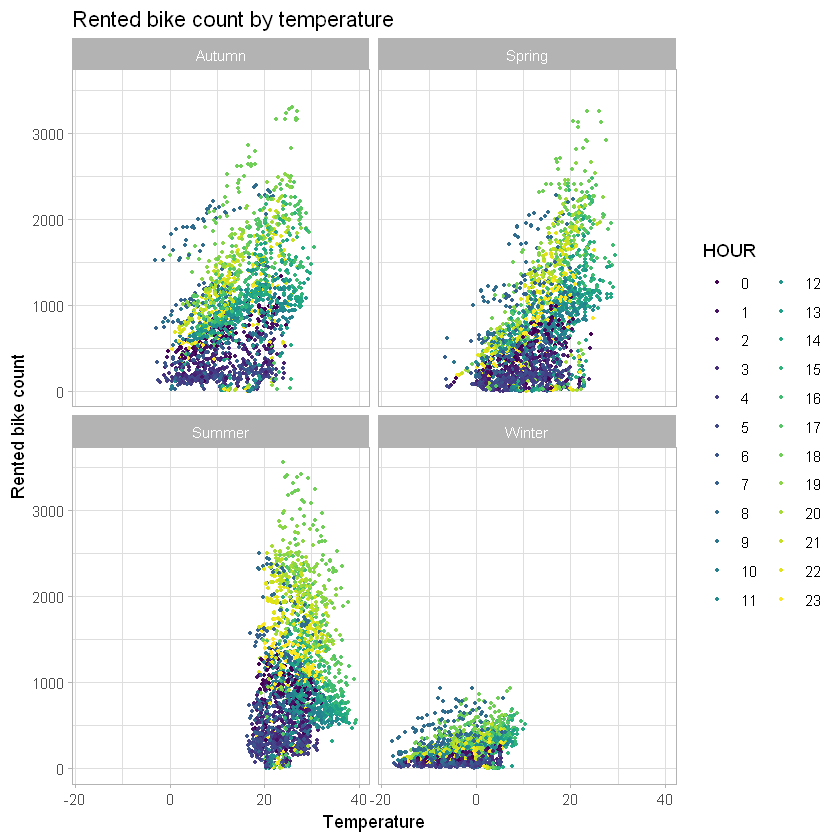

In [17]:
# provide your solution here
ggplot(seoul_bike_sharing, aes(x=TEMPERATURE, y=RENTED_BIKE_COUNT,colour = HOUR)) +
geom_point(size=0.8)+
labs(x="Temperature",
    y="Rented bike count",
    title="Rented bike count by temperature")+
theme_light()+
facet_wrap(~SEASONS)



Visually, we can see some strong correlations as approximately linear patterns.


Comparing this plot to the same plot below, but without grouping by `SEASONS`, shows how important seasonality is in explaining bike rental counts.


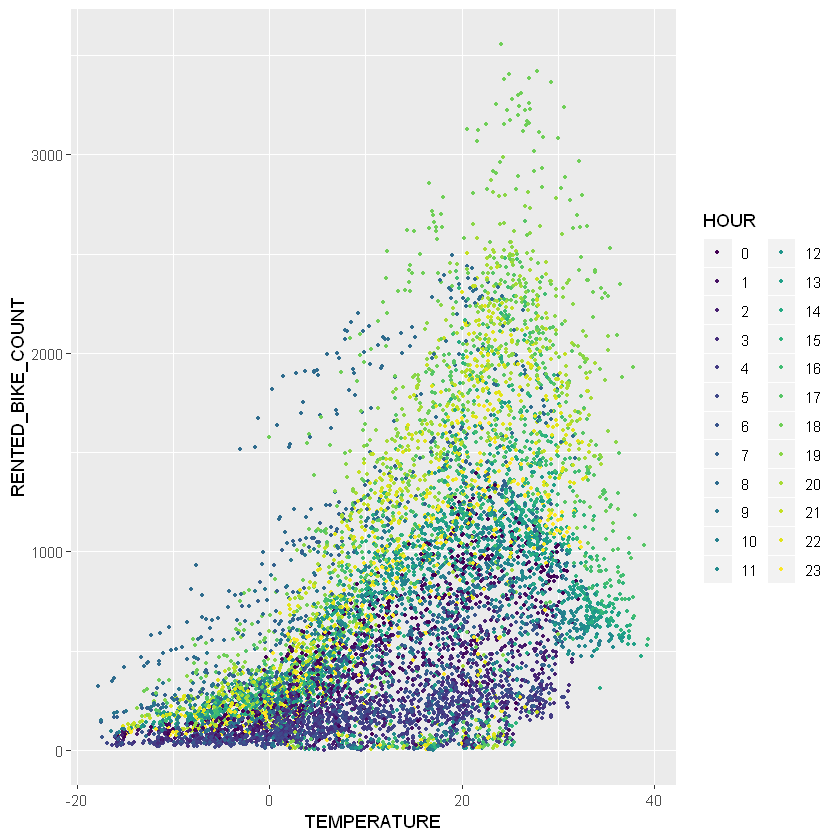

In [18]:
ggplot(seoul_bike_sharing) +
   geom_point(aes(x=TEMPERATURE,y=RENTED_BIKE_COUNT,colour=HOUR),size=0.8)

## Outliers (boxplot)

### Create a display of four boxplots of `RENTED_BIKE_COUNT` vs. `HOUR` grouped by `SEASONS`.



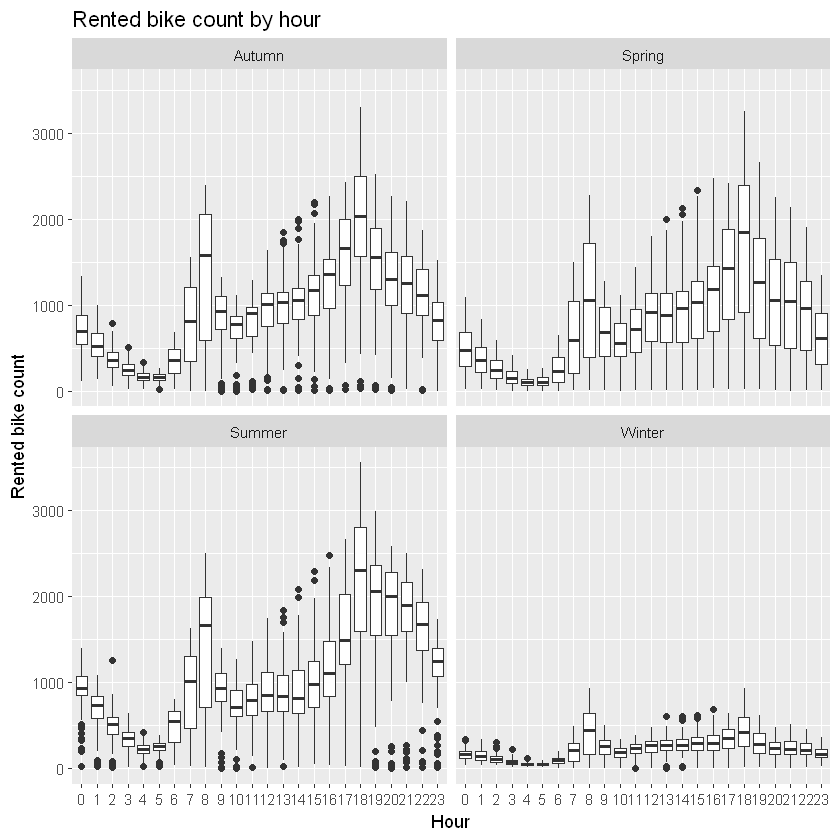

In [19]:
# provide your solution here
ggplot(seoul_bike_sharing, aes(x=HOUR, y=RENTED_BIKE_COUNT)) +
geom_boxplot()+
labs(x="Hour",
    y="Rented bike count",
    title="Rented bike count by hour")+
facet_wrap(~SEASONS)



Although the overall scale of bike rental counts changes with the seasons, key features remain very similar.\
For example, peak demand times are the same across all seasons, at 8 am and 6 pm.


###  Group the data by `DATE`, and use the summarize() function to calculate the daily total rainfall and snowfall.


In [20]:
# provide your solution here
Day_snowfall <- seoul_bike_sharing %>%
group_by(DATE) %>%
summarise(SR=sum(RAINFALL),SS=sum(SNOWFALL))

### Number of days had snowfall


In [21]:
# provide your solution here
print(length(which(Day_snowfall$SS > 0.0)))

[1] 27
